
# 📘 Análise e Segmentação de Clientes do Varejo 🛍️

Este é o **primeiro projeto de programação e Data Science**, desenvolvido para praticar
conceitos fundamentais de análise de dados e criar o **primeiro projeto de portfólio no GitHub**.



## 🔍 1. Análise Inicial da Base de Dados

Aqui realizamos o primeiro contato com a base de dados.

As principais ações dessa etapa são:
- Ler o arquivo CSV  
- Verificar o número de linhas e colunas  
- Identificar os tipos das variáveis  
- Verificar a existência de valores nulos  
- Visualizar as primeiras linhas da base  

Essa análise inicial ajuda a entender como os dados estão organizados e
quais problemas podem precisar de tratamento.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore

varejo = pd.read_csv("base_clientes_varejo.csv")

print(varejo.info())
varejo.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           50 non-null     int64  
 1   genero               50 non-null     object 
 2   idade                47 non-null     float64
 3   renda_mensal         50 non-null     float64
 4   score_compra         47 non-null     object 
 5   gasto_mensal         47 non-null     float64
 6   tempo_cliente_meses  50 non-null     int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 2.9+ KB
None


,id_cliente,genero,idade,renda_mensal,score_compra,gasto_mensal,tempo_cliente_meses
0,1,Masculino,43.0,6145.62,300.0,4353.557492,111
1,2,Fem,38.0,7452.97,NaN,4410.877919,98
2,3,Feminino,NaN,4946.92,NaN,NaN,118
3,4,Feminino,33.0,5508.51,300.0,4382.647414,96
4,5,Masculino,23.0,5411.84,200.0,2984.835975,49



## 🧹 2. Tratamento de Tipos e Variáveis Categóricas

Nesta etapa, realizamos ajustes importantes nos dados:

- Conversão da variável *score_compra* para o tipo numérico  
- Padronização do nome da coluna *genero* para *sexo*  
- Padronização das categorias (*Fem → Feminino*, *Masc → Masculino*)  

Esses ajustes são fundamentais para:
- Evitar erros durante as análises  
- Garantir consistência nos dados  
- Facilitar interpretações futuras  


In [3]:

varejo["score_compra"] = pd.to_numeric(varejo["score_compra"], errors="coerce")
varejo.rename(columns={"genero": "sexo"}, inplace=True)
varejo["sexo"] = varejo["sexo"].replace({
    "Fem": "Feminino",
    "Masc": "Masculino"
})

varejo["sexo"].value_counts()


sexo
Masculino    28
Feminino     22
Name: count, dtype: int64


## 📊 3. Estatística Descritiva

Aqui utilizamos estatísticas básicas para entender melhor os dados numéricos, como:
- Média  
- Desvio padrão  
- Valores mínimos e máximos  
- Quartis  

Essa etapa ajuda a identificar:
- Valores muito altos ou muito baixos  
- Possíveis outliers  
- Distribuição geral das variáveis  


In [4]:

varejo.describe()


,id_cliente,idade,renda_mensal,score_compra,gasto_mensal,tempo_cliente_meses
count,50.00000,47.000000,50.000000,46.000000,47.000000,50.00000
mean,25.50000,36.148936,5913.861800,347.826087,3607.366447,65.82000
std,14.57738,15.271426,1450.152958,93.664010,845.029578,38.34893
min,1.00000,-10.000000,3121.840000,200.000000,1856.708157,3.00000
25%,13.25000,30.500000,4855.570000,300.000000,3058.163362,26.75000
50%,25.50000,36.000000,5918.130000,400.000000,3566.637720,64.50000
75%,37.75000,42.500000,6567.640000,400.000000,4269.429187,100.25000
max,50.00000,110.000000,9694.860000,500.000000,5436.559811,119.00000



## 🚨 4. Tratamento de Outliers e Valores Ausentes

Nesta fase, lidamos com dois problemas comuns em bases reais.

### 🔹 Tratamento de Outliers
- Consideramos idades fora do intervalo **18 a 80 anos** como valores não plausíveis  
- Calculamos a média da idade sem esses valores extremos  
- Substituímos as idades fora do intervalo por essa média  

### 🔹 Tratamento de Valores Nulos
- Preenchemos valores ausentes da variável *idade*  
- Removemos registros com valores nulos em variáveis importantes para o modelo  

Esse cuidado garante dados mais confiáveis para as próximas análises.


In [5]:

media_sem_outlier = varejo.loc[varejo["idade"].between(18, 80), "idade"].mean()

varejo.loc[~varejo["idade"].between(18, 80), "idade"] = media_sem_outlier
varejo["idade"] = varejo["idade"].fillna(media_sem_outlier)

varejo = varejo.dropna(subset=["score_compra", "gasto_mensal"])

varejo.isna().sum()


id_cliente             0
sexo                   0
idade                  0
renda_mensal           0
score_compra           0
gasto_mensal           0
tempo_cliente_meses    0
dtype: int64


## 📈 5. Análise Exploratória dos Dados (EDA)

Nesta etapa exploramos os dados visualmente.

### 🔹 Correlação entre Variáveis
- Criamos uma matriz de correlação  
- Utilizamos um *heatmap* para visualizar relações entre variáveis  

### 🔹 Análise por Grupo
- Calculamos a renda média separada por sexo  

A EDA é essencial para entender padrões e relações antes
de aplicar modelos de Machine Learning.


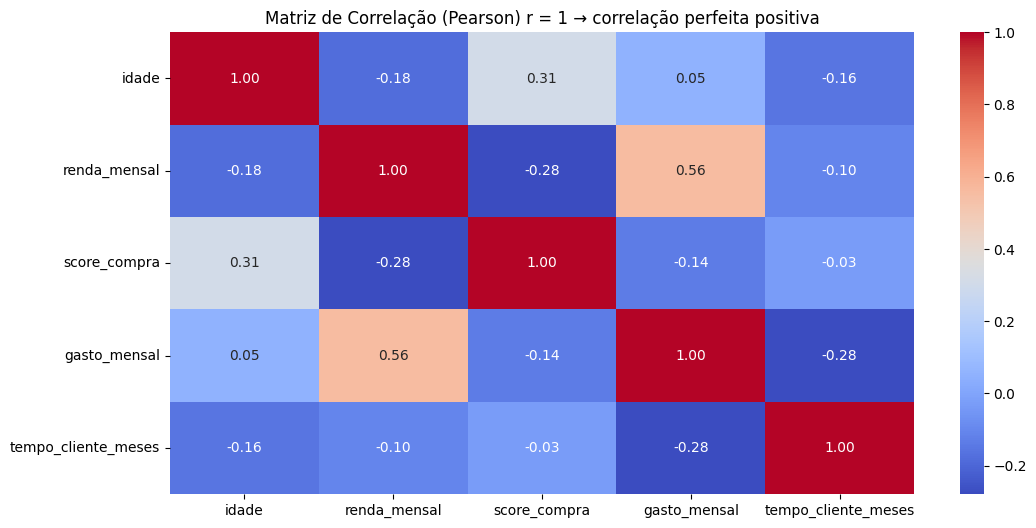

sexo
Feminino     6310.540588
Masculino    5710.834444
Name: renda_mensal, dtype: float64

In [6]:

varejonumeric = varejo.drop(columns=["id_cliente", "sexo"])
varejocorr = varejonumeric.corr()

plt.figure(figsize=(12,6))
sns.heatmap(
    varejocorr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title("Matriz de Correlação (Pearson) r = 1 → correlação perfeita positiva")
plt.show()

renda_genero = varejo.groupby("sexo")["renda_mensal"].mean()
renda_genero



## 🤖 6. Segmentação de Clientes com KMeans

Antes de aplicar o algoritmo, realizamos a padronização dos dados usando **Z-score**.

Isso é necessário porque:
- As variáveis estão em escalas diferentes  
- O KMeans é sensível à escala dos dados  


In [7]:

varejopad = varejonumeric.apply(zscore, ddof=1)



## 🦾 6.1 Método do Cotovelo (Elbow Method)

O método do cotovelo é utilizado para definir o número ideal de clusters.

- Testamos valores de *k* de 1 a 10  
- Calculamos o WCSS (soma dos erros quadráticos)  
- Analisamos o ponto onde a redução do erro começa a desacelerar  

Esse método ajuda a escolher um número de clusters mais adequado.


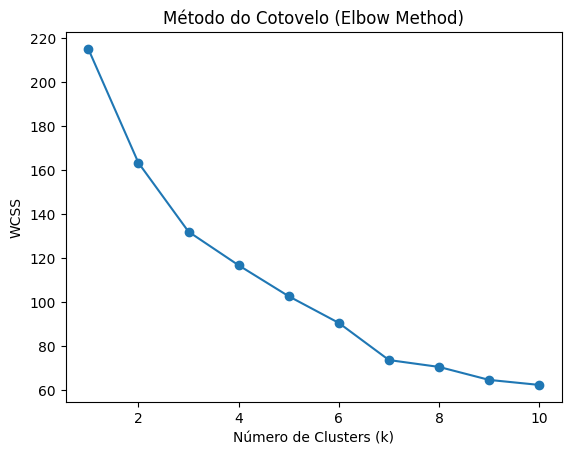

In [8]:

wcss = []
ks = range(1, 11)

for k in ks:
    kmeans = KMeans(n_clusters=k, init="random", random_state=42)
    kmeans.fit(varejopad)
    wcss.append(kmeans.inertia_)

plt.plot(ks, wcss, marker="o")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("WCSS")
plt.title("Método do Cotovelo (Elbow Method)")
plt.show()



## ✅ 6.2 Modelo Final — KMeans com k = 4

Com base no método do cotovelo:
- Ajustamos o modelo final com **4 clusters**  
- Criamos uma nova coluna no dataset indicando o cluster de cada cliente  

O resultado final é uma segmentação de clientes,
permitindo identificar diferentes perfis de consumo.


In [9]:

cluster_final = KMeans(n_clusters=4, init="random", random_state=42)
varejo["Cluster_KMeans"] = cluster_final.fit_predict(varejopad)

varejo.head()


,id_cliente,sexo,idade,renda_mensal,score_compra,gasto_mensal,tempo_cliente_meses,Cluster_KMeans
0,1,Masculino,43.0,6145.62,300.0,4353.557492,111,1
3,4,Feminino,33.0,5508.51,300.0,4382.647414,96,1
4,5,Masculino,23.0,5411.84,200.0,2984.835975,49,0
5,6,Masculino,30.0,3804.73,500.0,2471.646326,101,2
6,7,Masculino,32.0,6444.18,500.0,4807.408689,57,3



## 🏁 Conclusão

Este projeto permitiu aplicar, na prática:
- Programação em Python  
- Limpeza e tratamento de dados  
- Análise exploratória 
- Análise estatística  
- Visualização de dados  
- Machine Learning não supervisionado  

Além disso, representa o **primeiro projeto de portfólio**,
marcando o início da jornada em programação e Data Science.
